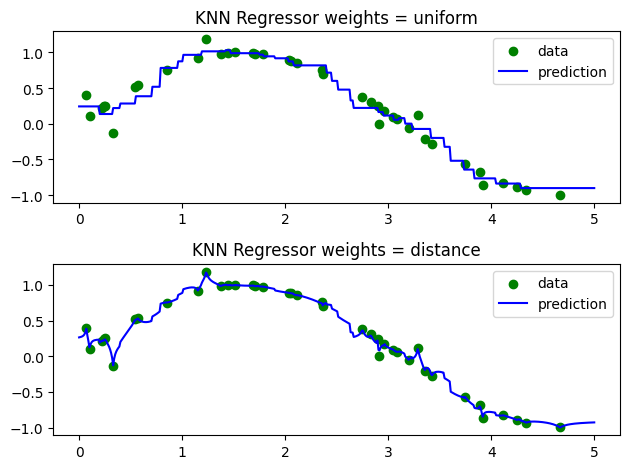

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

X = np.sort(5 * np.random.rand(40, 1), axis=0)  # features
y = np.sin(X).ravel()  # target

# add noise
y[::5] += 1 * (0.5 - np.random.rand(8))

# plot.scatter(x, y)

T = np.linspace(0, 5, 500)[:, np.newaxis]

for i, weight in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
    y_pred = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="green", label="data")
    plt.plot(T, y_pred, color="blue", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNN Regressor weights = {}".format(weight))

plt.tight_layout()
plt.show()